Predict the price of the house based on factors like rooms, bedrooms and landsize.

In [1]:
import pandas as pd
import os

In [2]:
os.chdir('E:\SkillEnable Class\Python\Datasets')

In [3]:
# Read and access data
house = pd.read_csv('Melbourne_housing_extra_data.csv')

In [4]:
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
house2 = house[['Price','Rooms', 'Bedroom2', 'Landsize']]

In [6]:
house2.head()

,Price,Rooms,Bedroom2,Landsize
0,NaN,2,2.0,126.0
1,1480000.0,2,2.0,202.0
2,1035000.0,2,2.0,156.0
3,NaN,3,3.0,0.0
4,1465000.0,3,3.0,134.0


In [7]:
house2.describe()

,Price,Rooms,Bedroom2,Landsize
count,1.539600e+04,19740.000000,15327.000000,14944.000000
mean,1.054957e+06,2.947163,2.900568,583.917090
std,6.452557e+05,0.981048,1.007491,3785.423175
min,8.500000e+04,1.000000,0.000000,0.000000
25%,6.300000e+05,2.000000,2.000000,166.000000
50%,8.800000e+05,3.000000,3.000000,420.000000
75%,1.301000e+06,4.000000,3.000000,663.000000
max,9.000000e+06,12.000000,30.000000,433014.000000


In [8]:
house2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     15396 non-null  float64
 1   Rooms     19740 non-null  int64  
 2   Bedroom2  15327 non-null  float64
 3   Landsize  14944 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 617.0 KB


## Option 1: We can remove rows if we have < 25% data missing from our column / table.
## Option 2: However if missing values are more than 25%, we should not remove them from our analysis.
### Replace such missing values:
### Data is Normal --> we will replace the missing values with the Mean of it
### Data is Not-Normal ---> we will replace missing values with the Median values.

#### We will check the Normality of our data by measuring the skewness value.
#### If skewness is between -1 and +1. This indicates data is Normal -> replace with mean
#### If skewness is < -1 or > 1 . This indicates data is Not-Normal. -> replace with median

In [9]:
print(house2.isnull().sum())
print(house2.shape)

Price       4344
Rooms          0
Bedroom2    4413
Landsize    4796
dtype: int64
(19740, 4)


In [10]:
print(house2['Price'].skew())
print(house2['Bedroom2'].skew())
print(house2['Landsize'].skew())

2.3647135694133263
1.9744507249368086
101.19472990366793


In [11]:
house2["Price"] = house2['Price'].fillna(house2['Price'].median())

C:\Users\User\AppData\Local\Temp\ipykernel_500\4141139395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house2["Price"] = house2['Price'].fillna(house2['Price'].median())


In [12]:
house2["Bedroom2"] = house2['Bedroom2'].fillna(house2['Bedroom2'].median())

C:\Users\User\AppData\Local\Temp\ipykernel_500\127135909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house2["Bedroom2"] = house2['Bedroom2'].fillna(house2['Bedroom2'].median())


In [13]:
house2["Landsize"] = house2['Landsize'].fillna(house2['Landsize'].median())

C:\Users\User\AppData\Local\Temp\ipykernel_500\139839907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house2["Landsize"] = house2['Landsize'].fillna(house2['Landsize'].median())


For both the dataset (one with removed missing values (i.e. house 4), another with replaced missing values (i.e. house2)....

Prepare a multiple linear regression model Y = m1X1 + m2X2 +..... + C alongwith the R-sq value.

Y -> Price

X -> Rooms, Bedroom2, Landsize

Feature Selection: 
    Selecting the X - factors by looking at the 

In [14]:
Y = house2[['Price']]
X = house2[['Rooms','Bedroom2','Landsize']]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

len(X_train), len(X_test), len(Y_train), len(Y_test)

(15792, 3948, 15792, 3948)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
mlr = LinearRegression()

In [18]:
model = mlr.fit(X_train, Y_train)

In [19]:
model

LinearRegression()

In [20]:
m = model.coef_
C = model.intercept_

In [21]:
print(m, C)

[[ 2.34051624e+05  2.42766267e+04 -3.40957251e-01]] [253664.50261803]


In [22]:
r_sq = model.score(X_train, Y_train)
r_sq

0.18211024368332085

In [23]:
X_test.head()

,Rooms,Bedroom2,Landsize
18228,3,3.0,420.0
15735,4,3.0,420.0
16068,4,4.0,706.0
6326,4,3.0,504.0
14340,3,3.0,420.0


In [24]:
Y_test.head()

,Price
18228,520000.0
15735,880000.0
16068,880000.0
6326,880000.0
14340,945000.0


In [25]:
Y_test['Price_pred'] = model.predict(X_test)

In [26]:
Y_test.head()

,Price,Price_pred
18228,520000.0,1.028506e+06
15735,880000.0,1.262558e+06
16068,880000.0,1.286737e+06
6326,880000.0,1.262529e+06
14340,945000.0,1.028506e+06


In [27]:
Y_test['Error'] = Y_test['Price'] - Y_test['Price_pred']
Y_test['sq_Error'] = (Y_test['Error']) ** 2

In [28]:
Y_test.head()

,Price,Price_pred,Error,sq_Error
18228,520000.0,1.028506e+06,-508506.053511,2.585784e+11
15735,880000.0,1.262558e+06,-382557.677762,1.463504e+11
16068,880000.0,1.286737e+06,-406736.790716,1.654348e+11
6326,880000.0,1.262529e+06,-382529.037353,1.463285e+11
14340,945000.0,1.028506e+06,-83506.053511,6.973261e+09


In [29]:
Error_mean = Y_test['sq_Error'].mean()

In [30]:
RMSE = Error_mean ** 0.5

In [31]:
# RMSE value
RMSE

520775.2956514336

In [32]:
import seaborn as sns 

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

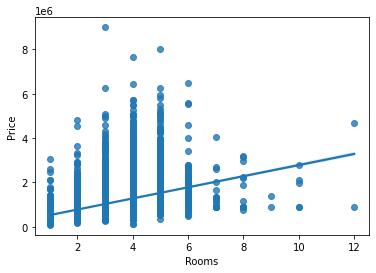

In [33]:
sns.regplot(data = house2, x = 'Rooms', y = 'Price')

In [34]:
# Validation
val_data = pd.DataFrame({"Last_Price" : ([3],[3],[400])})

In [35]:
Predict_Price = model.predict([[4, 3, 500]])

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
print(Predict_Price)

[[1262530.40118215]]


In [37]:
df = house[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']]

In [38]:
df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea
0,2,NaN,2.5,2.0,1.0,1.0,126.0,NaN
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,NaN
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0


In [39]:
df2 = df.dropna()

In [40]:
Matrix = df2.corr()

<AxesSubplot:>

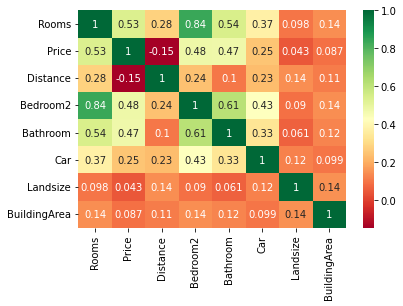

In [41]:
sns.heatmap(Matrix, annot = True, cmap = 'RdYlGn')

Feature Selection :
a) Selecting the X- factors by looking at the correlation between individual X's with Y
Strong Correlation: 0.6 to 1 or -0.6 to -1
No correlation : -0.6 to 0.6
Those X -factors which will have correlation coefficient value between -0.6 to 0.6, we will not select them for our MLR.
b) VIF / Multi Colliearity: If there are multiple X factors which are correlating among themselves, then we should keep only one of them......
Y = f(x1, x2, x3, x4, x5)
if there is a strong correlation between x1 and x2...... then we should keep either x1 or x2 for building the model.
Example Scenario:

 Y and x1 -> 0.75
Y and x2 -> 0.55
Y and x3 -> 0.33
Y and x4 -> -0.8
Y and x5 -> -0.7

Y = (x1, x4 , x5)
Check VIF
x1 and x4 -> -0.65
Final model should be build by keeping either x1 or x4
Y = (x4 , x5)

In [42]:
Y = df2[['Price']]
X = df2[['Rooms', 'Bathroom']]

from sklearn.model_selection import train_test_split

X_train, X_est, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 1)

In [43]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(5088, 3948, 5088, 1273)

In [44]:
model2 = mlr.fit(X_train, Y_train)
model2

LinearRegression()

In [45]:
model2.coef_

array([[269158.59377471, 255003.10679674]])

In [46]:
model2.intercept_

array([-118991.74589018])

In [47]:
model2.score(X_train, Y_train)

0.3336384114101355